In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [6]:
data = pd.read_csv("data.csv")
year_data = pd.read_csv("data_by_year.csv")
genre_data = pd.read_csv("data_by_genres.csv")
artist_data = pd.read_csv("data_by_artist.csv")

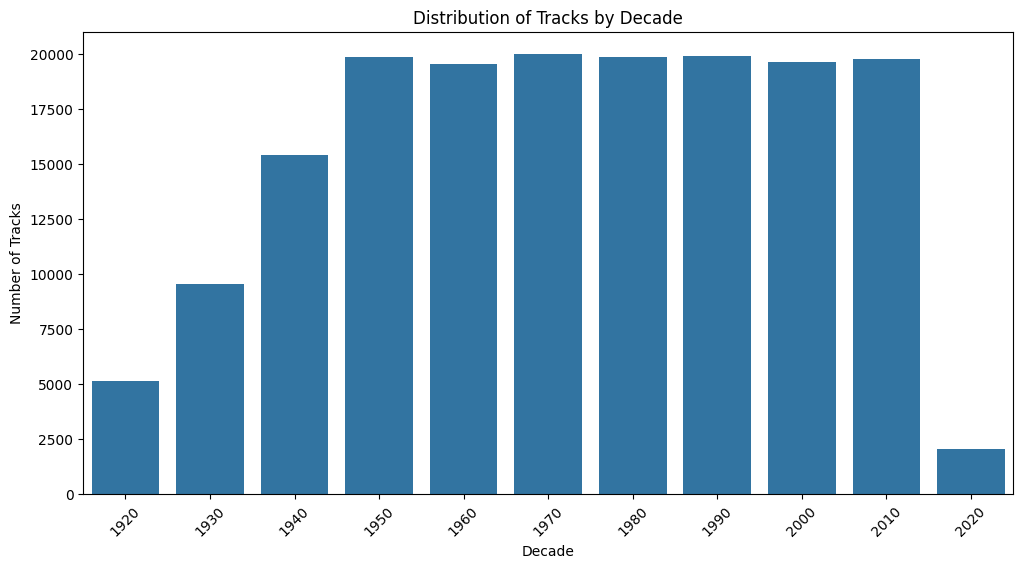

In [8]:
data['decade'] = data['year'].apply(lambda x: int(x) - int(x) % 10)

plt.figure(figsize=(12, 6))
sns.countplot(x='decade', data=data)
plt.title('Distribution of Tracks by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

In [13]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

fig = px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades')
fig.show()

In [14]:
fig = px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades')
fig.show()

In [15]:
top10_genres = genre_data.sort_values('popularity', ascending=False).head(10)

fig = px.bar(top10_genres, x='genres',
             y=['valence', 'energy', 'danceability', 'acousticness'],
             barmode='group',
             title='Trend of various sound features over top 10 genres')
fig.show()


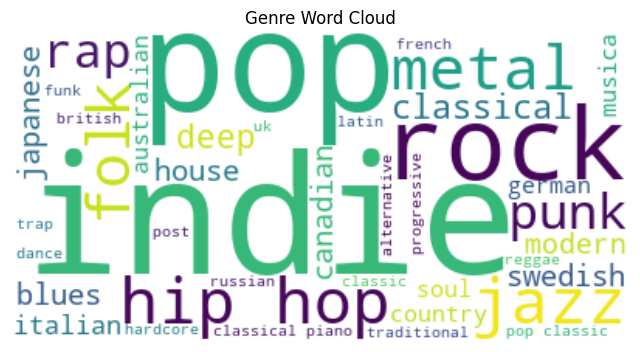

In [16]:
genres_text = ' '.join(genre_data['genres'].dropna())
wordcloud = WordCloud(
                      background_color='white', 
                      max_words=40, 
                      min_font_size=10).generate(genres_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

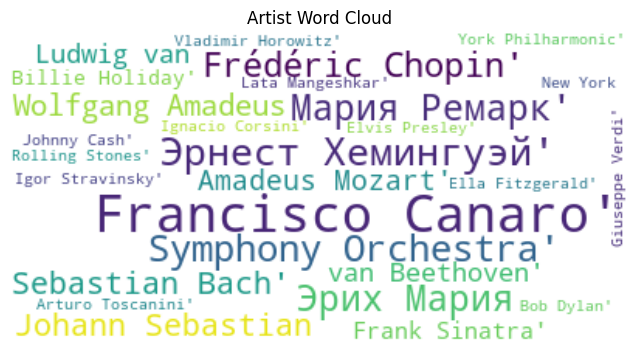

In [19]:
artists_text = ' '.join(data['artists'])
wordcloud = WordCloud( 
                      background_color='white', 
                      min_word_length=3,
                      max_words=40, 
                      min_font_size=10).generate(artists_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Artist Word Cloud')
plt.show()

In [20]:
top10_most_song_produced_artists = artist_data[['artists', 'count']].sort_values('count', ascending=False).head(10)
print(top10_most_song_produced_artists)


                 artists  count
8367    Francisco Canaro   3169
28561   Эрнест Хемингуэй   2422
28560  Эрих Мария Ремарк   2136
8434       Frank Sinatra   1459
10714    Ignacio Corsini   1256
27109  Vladimir Horowitz   1200
1682    Arturo Toscanini   1146
2707      Billie Holiday   1103
12378        Johnny Cash   1061
7426       Elvis Presley   1023


In [21]:
top10_popular_artists = artist_data[['artists', 'popularity']].sort_values('popularity', ascending=False).head(10)
print(top10_popular_artists)


               artists  popularity
20966      Ritt Momney        93.0
14354        Lele Pons        92.0
15070  Los Legendarios        90.0
11764         Jerry Di        89.0
28263      salem ilese        88.0
23687        Surf Mesa        88.0
7463            Emilee        88.0
213                A7S        87.0
26318             Towy        86.0
16453        Master KG        86.0
